# Ultrasound Nerve Segmentation

In [1]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader, sampler
from torchvision import transforms as T

from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime

from usns import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_PATH = 'data/'
MODEL_PATH = 'models/'
SUBMS_PATH = 'submissions/'

data_shape = (420, 580)

if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor

## View all points where mask appears in train dataset

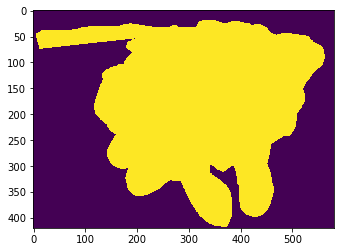

In [4]:
def show_all_masks():
    dpath = os.path.join(DATA_PATH, 'train')
    mask_list = [name for name in os.listdir(dpath) if 'mask' in name]
    
    acc_img = np.zeros(data_shape, dtype='uint64')
    ii = 0
    for fname in mask_list:
        img = Image.open(os.path.join(dpath, fname))
        img = np.array(img)
        img = img // 255
        acc_img += img
        ii += 1
    
    acc_img = (acc_img > 0) * 1
#     acc_img = acc_img / ii
    
    plt.imshow(acc_img)
    return acc_img
    
im = show_all_masks()

## Data preparation

Trying to train model only on samples with labels.
After this we will try to additional layers to detect if there is a nerve on the image

In [4]:
# Creating links in dedicated folder on images only containing labeled nerve
def symlink_labeled(labeled_path):
    try:
        os.mkdir(labeled_path)
    except FileExistsError:
        print('Directory is already exists')
    
    train_path = os.path.join(DATA_PATH, 'train')
    rel_train_path = os.path.relpath(train_path, labeled_path)
    for imgname in os.listdir(train_path):
        if 'mask' not in imgname:
            maskname = imgname.replace('.tif', '_mask.tif')
            mask = Image.open(os.path.join(train_path, maskname))
            if np.array(mask).any():
                os.symlink(os.path.join(rel_train_path, imgname),
                           os.path.join(labeled_path, imgname))
                os.symlink(os.path.join(rel_train_path, maskname),
                           os.path.join(labeled_path, maskname))

#symlink_labeled(os.path.join(DATA_PATH, 'labeled'))

## Training Unet model

Firstly, training only on labeled data

In [5]:
params = {
    'batch_size': 2,
    'num_train': 2000
}

In [6]:
trainset = USNSDataset(os.path.join(DATA_PATH, 'labeled'), train=True, transform=transform, mask_transform=transform_mask)

loader_train = DataLoader(trainset, batch_size=params['batch_size'],
                          sampler=sampler.SubsetRandomSampler(range(params['num_train'])))
loader_val = DataLoader(trainset, batch_size=params['batch_size'],
                        sampler=sampler.SubsetRandomSampler(range(params['num_train'], trainset.__len__())))

In [7]:
unet = Unet(n_filters=64)
unet = unet.to(device=device);

Iteration 99, loss = 0.13352322588010676
Validation loss = 0.14618682610323966

Iteration 199, loss = 0.13158489870336512
Validation loss = 0.13501426302006223

Iteration 299, loss = 0.14863963092502613
Validation loss = 0.13029891307899014

Iteration 399, loss = 0.10948860268597282
Validation loss = 0.10839009190267032

Iteration 499, loss = 0.12916843121396052
Validation loss = 0.12912695426368712

Iteration 599, loss = 0.13303982778097606
Validation loss = 0.1255106539659867

Iteration 699, loss = 0.14958401890290282
Validation loss = 0.12740377510503392

Iteration 799, loss = 0.16259511109387081
Validation loss = 0.14095376845470542

Iteration 899, loss = 0.10694239872683774
Validation loss = 0.0928390287654729

Iteration 999, loss = 0.1532514151989156
Validation loss = 0.13333120132735915

After 1 epochs: loss = 0.1532514151989156
Validation loss = 0.14735127655671118


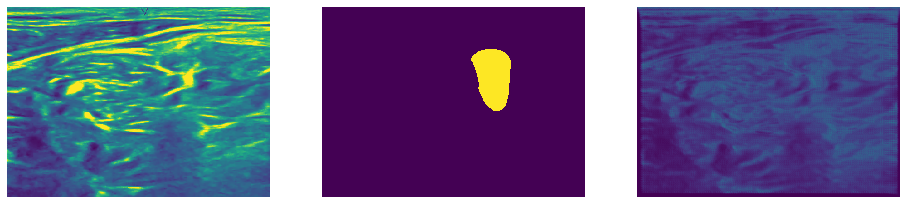


Iteration 99, loss = 0.14913214963414287
Validation loss = 0.1313733382956138

Iteration 199, loss = 0.10848131130485573
Validation loss = 0.10410782951682616

Iteration 299, loss = 0.10778443848351732
Validation loss = 0.11452747323344609

Iteration 399, loss = 0.13079820750763888
Validation loss = 0.11342565761453098

Iteration 499, loss = 0.1394591980027282
Validation loss = 0.11694132478869912

Iteration 599, loss = 0.11655404200478957
Validation loss = 0.13387083437326627

Iteration 699, loss = 0.10771931908371435
Validation loss = 0.0807859343014473

Iteration 799, loss = 0.1259086318484416
Validation loss = 0.14950807400882912

Iteration 899, loss = 0.1395789295584866
Validation loss = 0.12946257787841503

Iteration 999, loss = 0.13548040977116016
Validation loss = 0.11906284079234711

After 2 epochs: loss = 0.13548040977116016
Validation loss = 0.10260177216482408


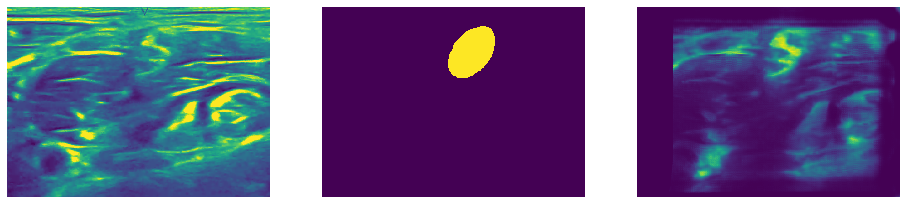


Iteration 99, loss = 0.12001236432744254
Validation loss = 0.10336266263965468

Iteration 199, loss = 0.11354223853062706
Validation loss = 0.11503305057955768

Iteration 299, loss = 0.10128600139670997
Validation loss = 0.09971133700978155

Iteration 399, loss = 0.11189591415759953
Validation loss = 0.09429466148097809

Iteration 499, loss = 0.06986475346441319
Validation loss = 0.10381348649585594

Iteration 599, loss = 0.09602089910209019
Validation loss = 0.05720173217626407

Iteration 699, loss = 0.10747201178602805
Validation loss = 0.0704976285301116

Iteration 799, loss = 0.10613647369444555
Validation loss = 0.14118861984540607

Iteration 899, loss = 0.08371724975021815
Validation loss = 0.09540247274881315

Iteration 999, loss = 0.10618164167158294
Validation loss = 0.10371254599762231

After 3 epochs: loss = 0.10618164167158294
Validation loss = 0.10936956487070414


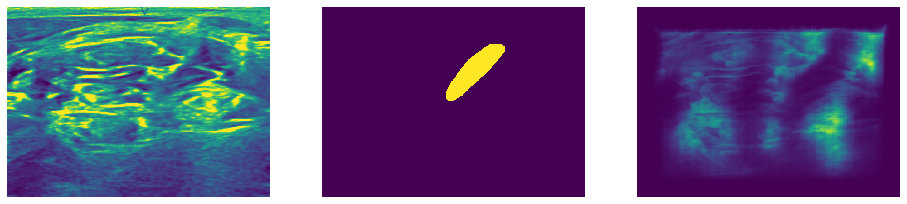


Iteration 99, loss = 0.09417042998640299
Validation loss = 0.10450263554904449

Iteration 199, loss = 0.10084212835107892
Validation loss = 0.0951150299069588

Iteration 299, loss = 0.09204783459303167
Validation loss = 0.09586449584965218

Iteration 399, loss = 0.10659828980507216
Validation loss = 0.08946550202956201

Iteration 499, loss = 0.0795048354813506
Validation loss = 0.084774715122706

Iteration 599, loss = 0.09676797389439082
Validation loss = 0.08041398556928477

Iteration 699, loss = 0.07756942782202735
Validation loss = 0.21968618256481184

Iteration 799, loss = 0.13225237883914456
Validation loss = 0.07281617590182171

Iteration 899, loss = 0.09611112658955659
Validation loss = 0.10574367916107906

Iteration 999, loss = 0.09599262043175905
Validation loss = 0.07311767105007848

After 4 epochs: loss = 0.09599262043175905
Validation loss = 0.11276863343330946


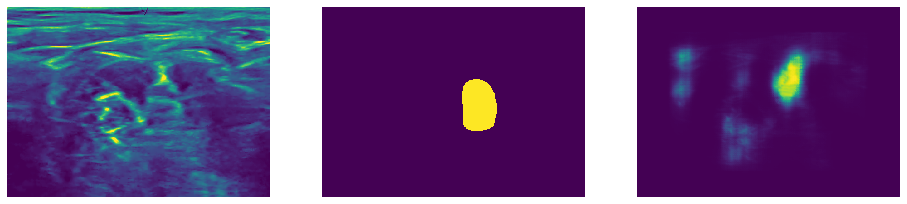


Iteration 99, loss = 0.1081663829292526
Validation loss = 0.10498510679810641

Iteration 199, loss = 0.0748436298187405
Validation loss = 0.1137486245942709

Iteration 299, loss = 0.09926144338249746
Validation loss = 0.11170080437540308

Iteration 399, loss = 0.0897178357316555
Validation loss = 0.06942153553073636

Iteration 499, loss = 0.06783891797730392
Validation loss = 0.09066046160610913

Iteration 599, loss = 0.11996569531022824
Validation loss = 0.09705845190645884

Iteration 699, loss = 0.12258059835938076
Validation loss = 0.05505557073873395

Iteration 799, loss = 0.06530756563088931
Validation loss = 0.09664340519456734

Iteration 899, loss = 0.07448946370397226
Validation loss = 0.07230668692413149

Iteration 999, loss = 0.09200645463209862
Validation loss = 0.05453808670839796

After 5 epochs: loss = 0.09200645463209862
Validation loss = 0.09158171329481021


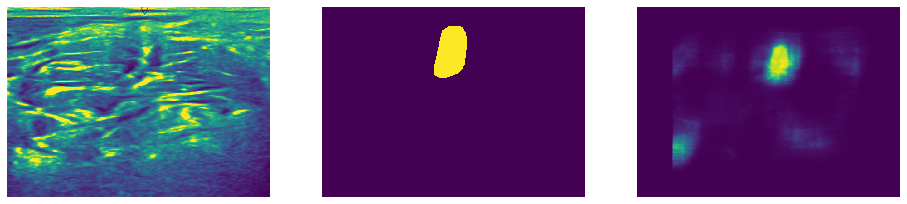


Iteration 99, loss = 0.05908232288629018
Validation loss = 0.12502520011473564

Iteration 199, loss = 0.067000012220071
Validation loss = 0.16688433850637802

Iteration 299, loss = 0.07304539908361594
Validation loss = 0.10610332999127098

Iteration 399, loss = 0.1079371550100317
Validation loss = 0.12206184990550478

Iteration 499, loss = 0.0727128652811754
Validation loss = 0.0382208262429202

Iteration 599, loss = 0.0378331814073657
Validation loss = 0.05339378925249035

Iteration 699, loss = 0.059738024713246116
Validation loss = 0.102414581636814

Iteration 799, loss = 0.09991611523425285
Validation loss = 0.05263566094162122

Iteration 899, loss = 0.07977284464347996
Validation loss = 0.06734138400225953

Iteration 999, loss = 0.06393663043816383
Validation loss = 0.06844477546657535

After 6 epochs: loss = 0.06393663043816383
Validation loss = 0.050743232703119284


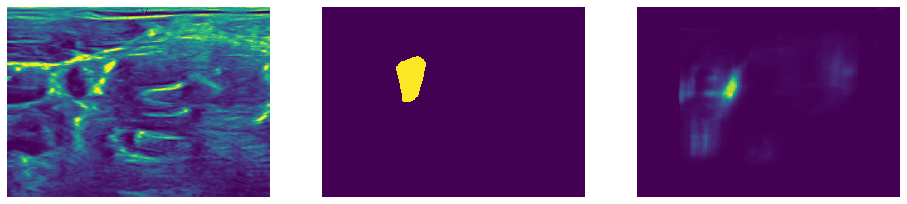


Iteration 99, loss = 0.05328554723211607
Validation loss = 0.05056699250608616

Iteration 199, loss = 0.07175499764921132
Validation loss = 0.058897906364731155

Iteration 299, loss = 0.0576495488297077
Validation loss = 0.03900046017063623

Iteration 399, loss = 0.06962320629507271
Validation loss = 0.0873302334376035

Iteration 499, loss = 0.05883555198463521
Validation loss = 0.07906183483954264

Iteration 599, loss = 0.04965437081221016
Validation loss = 0.05709600857952047

Iteration 699, loss = 0.07707285504728537
Validation loss = 0.06394623565288575

Iteration 799, loss = 0.09025692746121645
Validation loss = 0.05847036079320599

Iteration 899, loss = 0.09607517528849326
Validation loss = 0.12822133297964938

Iteration 999, loss = 0.06803644917530668
Validation loss = 0.0758839502556401

After 7 epochs: loss = 0.06803644917530668
Validation loss = 0.06677872137806937


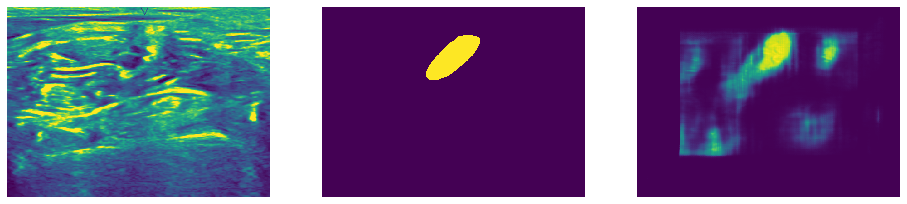


Iteration 99, loss = 0.058790804356933485
Validation loss = 0.047432749422610256

Iteration 199, loss = 0.07220364470626277
Validation loss = 0.07013134195002492

Iteration 299, loss = 0.05900600832122681
Validation loss = 0.16428757054554216

Iteration 399, loss = 0.05873901186210805
Validation loss = 0.040943384235975086

Iteration 499, loss = 0.028537439346681494
Validation loss = 0.12888685459724886

Iteration 599, loss = 0.04064328838631063
Validation loss = 0.07018184148185075

Iteration 699, loss = 0.03264056995320394
Validation loss = 0.04099723963770692

Iteration 799, loss = 0.0275690501841651
Validation loss = 0.061668193870495165

Iteration 899, loss = 0.053313580670955485
Validation loss = 0.028708813575969796

Iteration 999, loss = 0.04228257084251019
Validation loss = 0.04259917358767569

After 8 epochs: loss = 0.04228257084251019
Validation loss = 0.08015427323267059


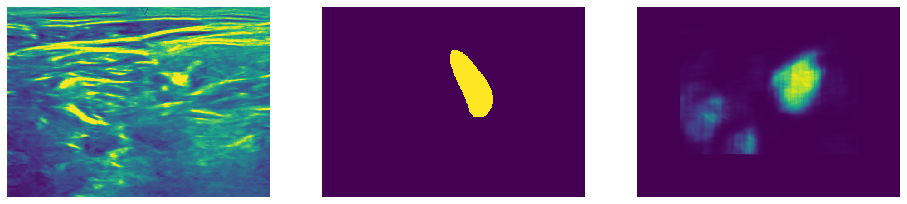


Iteration 99, loss = 0.04619051608610945
Validation loss = 0.027518687250622002

Iteration 199, loss = 0.03903957132189888
Validation loss = 0.033482510283985405

Iteration 299, loss = 0.04191845582204265
Validation loss = 0.02851072883472479

Iteration 399, loss = 0.09076232801020392
Validation loss = 0.0630043483280295

Iteration 499, loss = 0.03623809013649967
Validation loss = 0.04668010033584538

Iteration 599, loss = 0.04382668553827983
Validation loss = 0.17336464499207704

Iteration 699, loss = 0.037990194114405434
Validation loss = 0.03547947404104135

Iteration 799, loss = 0.03360784022322706
Validation loss = 0.051331247106431284

Iteration 899, loss = 0.046977925387778445
Validation loss = 0.022317958103340585

Iteration 999, loss = 0.04349808414463446
Validation loss = 0.03534121823595879

After 9 epochs: loss = 0.04349808414463446
Validation loss = 0.04673165240705954


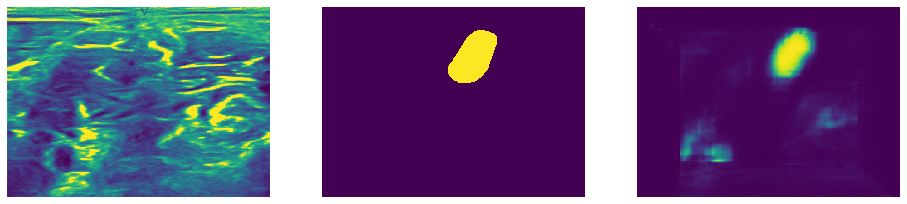


Iteration 99, loss = 0.040306210306666486
Validation loss = 0.03247266234584054

Iteration 199, loss = 0.017815207536105958
Validation loss = 0.07630615073397592

Iteration 299, loss = 0.04015603114122429
Validation loss = 0.03482552575953957

Iteration 399, loss = 0.07080994188603504
Validation loss = 0.06860557194825162

Iteration 499, loss = 0.0379074433980263
Validation loss = 0.027130625310222718

Iteration 599, loss = 0.04008154094746493
Validation loss = 0.061660503528007164

Iteration 699, loss = 0.036594081629313595
Validation loss = 0.11965180026139184

Iteration 799, loss = 0.03679038068397367
Validation loss = 0.08483933791045985

Iteration 899, loss = 0.0733677884132329
Validation loss = 0.05383070377033676

Iteration 999, loss = 0.03606886861978889
Validation loss = 0.11381308164375498

After 10 epochs: loss = 0.03606886861978889
Validation loss = 0.06583733724512969


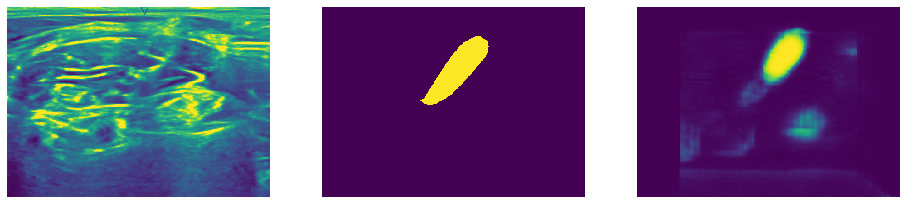


Iteration 99, loss = 0.03896317962530908
Validation loss = 0.047602137651649445

Iteration 199, loss = 0.02873652401943817
Validation loss = 0.02328248715693937

Iteration 299, loss = 0.06552761875867555
Validation loss = 0.05054401055644823

Iteration 399, loss = 0.03551064166624591
Validation loss = 0.0950142844354864

Iteration 499, loss = 0.04942259184654639
Validation loss = 0.04962555980868121

Iteration 599, loss = 0.07246727311058412
Validation loss = 0.027457990819693457

Iteration 699, loss = 0.04896573231920531
Validation loss = 0.039413566157872205

Iteration 799, loss = 0.026522185382306007
Validation loss = 0.07824002460812893

Iteration 899, loss = 0.041350817762754524
Validation loss = 0.03808308434463463

Iteration 999, loss = 0.019633685204629492
Validation loss = 0.03746878340691177

After 11 epochs: loss = 0.019633685204629492
Validation loss = 0.07181261392176364


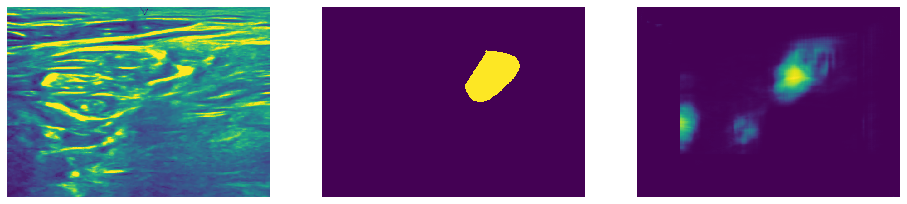


Iteration 99, loss = 0.05271050366774327
Validation loss = 0.06389514756321797

Iteration 199, loss = 0.07801769119576164
Validation loss = 0.032945628922851265

Iteration 299, loss = 0.059050428884065496
Validation loss = 0.014869479463019794

Iteration 399, loss = 0.02332397045668607
Validation loss = 0.026128725357378896

Iteration 499, loss = 0.04996476502327734
Validation loss = 0.04801683840096827

Iteration 599, loss = 0.031699272200518824
Validation loss = 0.030555717068531527

Iteration 699, loss = 0.054743968856282556
Validation loss = 0.08191391417753185

Iteration 799, loss = 0.038060324277559086
Validation loss = 0.0484825851959922

Iteration 899, loss = 0.04084224910688773
Validation loss = 0.04955560568430677

Iteration 999, loss = 0.02893504576510425
Validation loss = 0.021262536681006628

After 12 epochs: loss = 0.02893504576510425
Validation loss = 0.02291588197623232


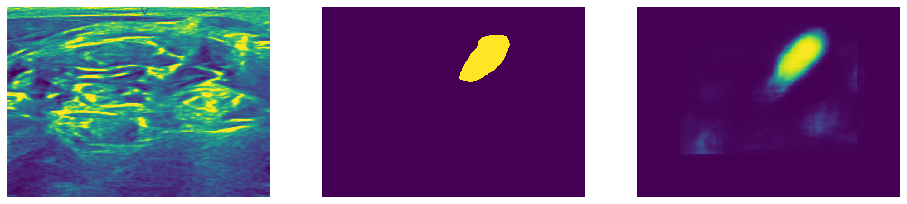


Iteration 99, loss = 0.028671979366831996
Validation loss = 0.03427486534660001

Iteration 199, loss = 0.03979021443209637
Validation loss = 0.02286024417752071

Iteration 299, loss = 0.024377458944426618
Validation loss = 0.033433457859044315

Iteration 399, loss = 0.08338518297350363
Validation loss = 0.07536949610781522

Iteration 499, loss = 0.11294223061148596
Validation loss = 0.03030175551637079

Iteration 599, loss = 0.044090825393875946
Validation loss = 0.049904247457106705

Iteration 699, loss = 0.03498533677334232
Validation loss = 0.04179362477779254

Iteration 799, loss = 0.05619616980880342
Validation loss = 0.07920395306363047

Iteration 899, loss = 0.01975020871120105
Validation loss = 0.051894587146278134

Iteration 999, loss = 0.0307879087212123
Validation loss = 0.038829046812831974

After 13 epochs: loss = 0.0307879087212123
Validation loss = 0.04133311543564573


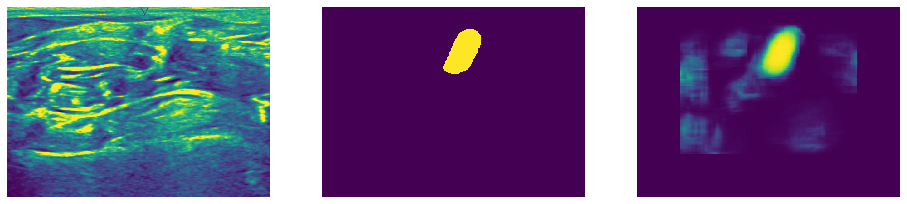


Iteration 99, loss = 0.12705127681766143
Validation loss = 0.026002208839766977

Iteration 199, loss = 0.04147406962089328
Validation loss = 0.016388692619911254

Iteration 299, loss = 0.019106202490999875
Validation loss = 0.040928761652497675

Iteration 399, loss = 0.022330326370932282
Validation loss = 0.02147495546465782

Iteration 499, loss = 0.04904970788226375
Validation loss = 0.027170314855378824

Iteration 599, loss = 0.02756753069327266
Validation loss = 0.02100812922312837

Iteration 699, loss = 0.0745706396760488
Validation loss = 0.030308255395420054

Iteration 799, loss = 0.030045797052511262
Validation loss = 0.09527776867210556

Iteration 899, loss = 0.03038686611522696
Validation loss = 0.018960743661842014

Iteration 999, loss = 0.02732952259509967
Validation loss = 0.11699437840721401

After 14 epochs: loss = 0.02732952259509967
Validation loss = 0.018872726330091977


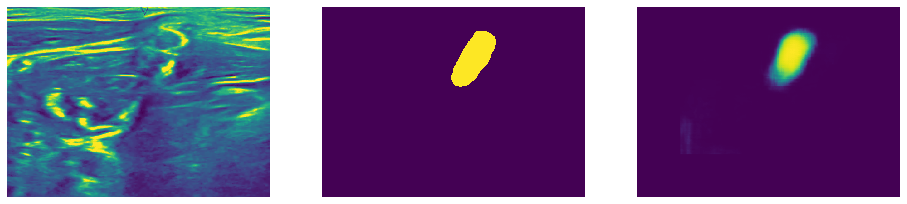


Iteration 99, loss = 0.054484129214902574
Validation loss = 0.1998798076804516

Iteration 199, loss = 0.028239766207236543
Validation loss = 0.02450941187576467

Iteration 299, loss = 0.024391102715888135
Validation loss = 0.017421010750426562

Iteration 399, loss = 0.05283444910130393
Validation loss = 0.06797536100833423

Iteration 499, loss = 0.025686389471776604
Validation loss = 0.04477663429413071

Iteration 599, loss = 0.05781311117549055
Validation loss = 0.040795218577359633

Iteration 699, loss = 0.04844489479420875
Validation loss = 0.13746270823709805

Iteration 799, loss = 0.027357635270555274
Validation loss = 0.042879423459308716

Iteration 899, loss = 0.021108494100425774
Validation loss = 0.10928280683090502

Iteration 999, loss = 0.028329942267669966
Validation loss = 0.15490349695875727

After 15 epochs: loss = 0.028329942267669966
Validation loss = 0.035566744830881396


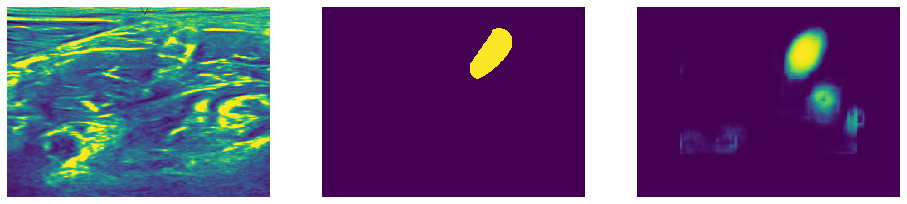


Iteration 99, loss = 0.050050567075109555
Validation loss = 0.021336208445067985

Iteration 199, loss = 0.07856200623486166
Validation loss = 0.016872307303097644

Iteration 299, loss = 0.021497770572848216
Validation loss = 0.024846076646712897

Iteration 399, loss = 0.02501835142647968
Validation loss = 0.07931557719678131

Iteration 499, loss = 0.07294880994024155
Validation loss = 0.032332235168765676

Iteration 599, loss = 0.042127984307571045
Validation loss = 0.02831671543684476

Iteration 699, loss = 0.05201064554354917
Validation loss = 0.029765059437197754

Iteration 799, loss = 0.028325334499023896
Validation loss = 0.03277935771251833

Iteration 899, loss = 0.0415576087682352
Validation loss = 0.11890542709821277

Iteration 999, loss = 0.03536815611465881
Validation loss = 0.02570299464526745

After 16 epochs: loss = 0.03536815611465881
Validation loss = 0.036640830452956394


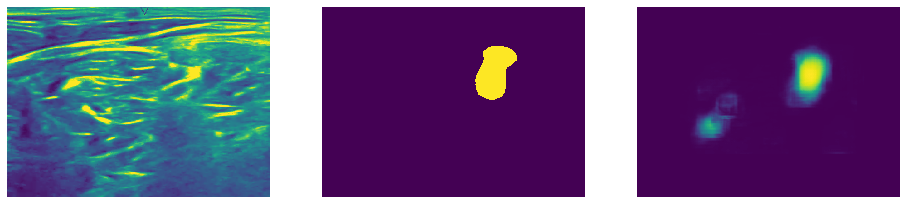


Iteration 99, loss = 0.027735989902112027
Validation loss = 0.04919766481462045

Iteration 199, loss = 0.01776674372130866
Validation loss = 0.028870660408401604

Iteration 299, loss = 0.01793192437317078
Validation loss = 0.01604522034604734

Iteration 399, loss = 0.019076623786706097
Validation loss = 0.03621318167261276

Iteration 499, loss = 0.09383243324908826
Validation loss = 0.047011542207484734

Iteration 599, loss = 0.033116673625315736
Validation loss = 0.01658004120752476

Iteration 699, loss = 0.03166320937754836
Validation loss = 0.023732464051918

Iteration 799, loss = 0.04509018840611625
Validation loss = 0.02475169576239343

Iteration 899, loss = 0.029586685377524142
Validation loss = 0.04013866279214583

Iteration 999, loss = 0.027249319526727617
Validation loss = 0.04322785864152142

After 17 epochs: loss = 0.027249319526727617
Validation loss = 0.018751358764630542


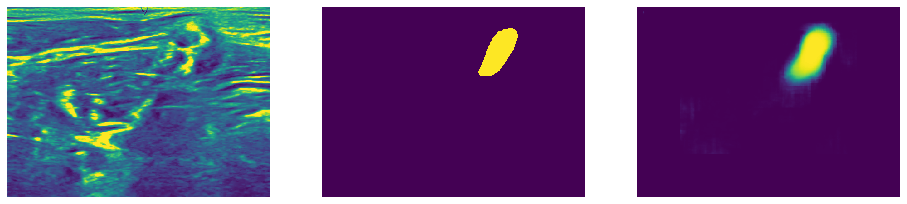


Iteration 99, loss = 0.023100098868134408
Validation loss = 0.03245248331779196

Iteration 199, loss = 0.021648425876982017
Validation loss = 0.021785499068078026

Iteration 299, loss = 0.029512943586719964
Validation loss = 0.026700959693511103

Iteration 399, loss = 0.028481794714684792
Validation loss = 0.018883032206023772

Iteration 499, loss = 0.02526580732640543
Validation loss = 0.06583793961136203

Iteration 599, loss = 0.04231421845416835
Validation loss = 0.02790314182598085

Iteration 699, loss = 0.036726672388392875
Validation loss = 0.029411563850401046

Iteration 799, loss = 0.04373459739391196
Validation loss = 0.1473978319238297

Iteration 899, loss = 0.024103376636612855
Validation loss = 0.01470087574064713

Iteration 999, loss = 0.036643963127297494
Validation loss = 0.0309828394844767

After 18 epochs: loss = 0.036643963127297494
Validation loss = 0.042079084849288115


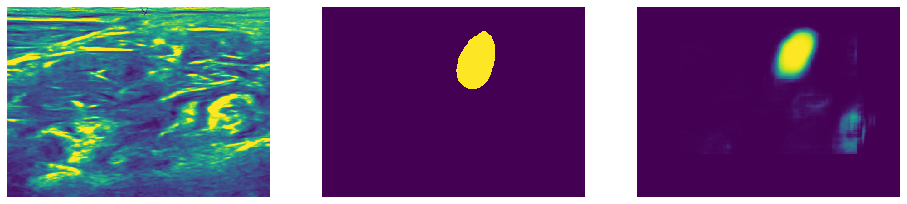


Iteration 99, loss = 0.01762115697428735
Validation loss = 0.04501666981465625

Iteration 199, loss = 0.032165556396820665
Validation loss = 0.1052681008879585

Iteration 299, loss = 0.029415771475677786
Validation loss = 0.11840405115693424

Iteration 399, loss = 0.01975738081973004
Validation loss = 0.042870145052505595

Iteration 499, loss = 0.05169937079692179
Validation loss = 0.016737205461419005

Iteration 599, loss = 0.027234773231425147
Validation loss = 0.028895229425452997

Iteration 699, loss = 0.019322276163989065
Validation loss = 0.040187482870195884

Iteration 799, loss = 0.01700644122263564
Validation loss = 0.029180014414762933

Iteration 899, loss = 0.03637211906755899
Validation loss = 0.035666118617069975

Iteration 999, loss = 0.03584772711863108
Validation loss = 0.07350602027907104

After 19 epochs: loss = 0.03584772711863108
Validation loss = 0.05392503397778741


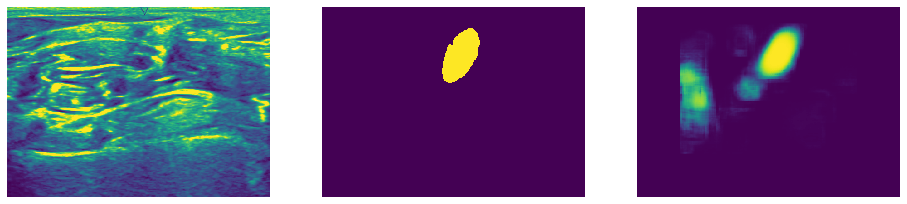


Iteration 99, loss = 0.02696838245216389
Validation loss = 0.01788570600284498

Iteration 199, loss = 0.027325378431040475
Validation loss = 0.015564814073277356

Iteration 299, loss = 0.03859872048755106
Validation loss = 0.03391015561640467

Iteration 399, loss = 0.033522509844912264
Validation loss = 0.032668699040443436

Iteration 499, loss = 0.029039774655479893
Validation loss = 0.02469042406087295

Iteration 599, loss = 0.02437259908140181
Validation loss = 0.01370956404843693

Iteration 699, loss = 0.03364717198063275
Validation loss = 0.0267389816315875

Iteration 799, loss = 0.07276505158042515
Validation loss = 0.020410987442507664

Iteration 899, loss = 0.018631338638464365
Validation loss = 0.07239334770725887

Iteration 999, loss = 0.01753633762915354
Validation loss = 0.04845718219167804

After 20 epochs: loss = 0.01753633762915354
Validation loss = 0.026695983219813448


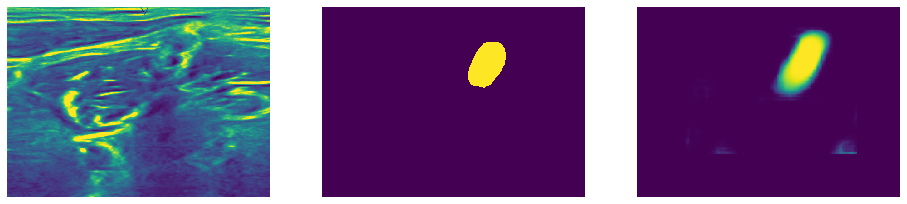


Iteration 99, loss = 0.013426583152157518
Validation loss = 0.020367642809743444

Iteration 199, loss = 0.04671949683511393
Validation loss = 0.06624331863404208

Iteration 299, loss = 0.06996360476589054
Validation loss = 0.15502304414936818

Iteration 399, loss = 0.043354537293511054
Validation loss = 0.047648051867808114

Iteration 499, loss = 0.015328689947635497
Validation loss = 0.024193349263876264

Iteration 599, loss = 0.021203364049889272
Validation loss = 0.05534984325551695

Iteration 699, loss = 0.03954581108375102
Validation loss = 0.018052944662840874

Iteration 799, loss = 0.021255708318592727
Validation loss = 0.02279630408457106

Iteration 899, loss = 0.039012692788390604
Validation loss = 0.01719465519625646

Iteration 999, loss = 0.014938621049505019
Validation loss = 0.0701826226830436

After 21 epochs: loss = 0.014938621049505019
Validation loss = 0.029992283010595647


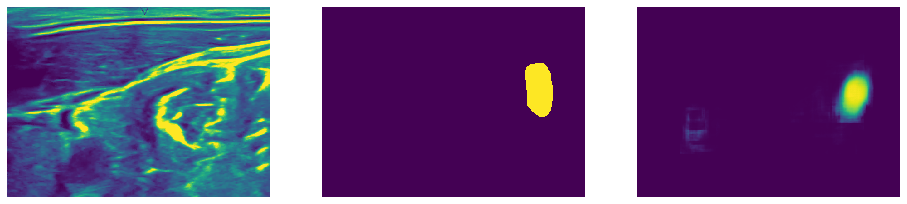


Iteration 99, loss = 0.054201031047147206
Validation loss = 0.028062963683052795

Iteration 199, loss = 0.0287170826569223
Validation loss = 0.01770506933613574

Iteration 299, loss = 0.01943075618931549
Validation loss = 0.027925766600799064

Iteration 399, loss = 0.1022497528595967
Validation loss = 0.01622936433131781

Iteration 499, loss = 0.02853372620987625
Validation loss = 0.1275944846364756

Iteration 599, loss = 0.0217115574283369
Validation loss = 0.02550973412345262

Iteration 699, loss = 0.031824688064787936
Validation loss = 0.01716457031532094

Iteration 799, loss = 0.04334525648496397
Validation loss = 0.011508239095698689

Iteration 899, loss = 0.01294260965474626
Validation loss = 0.025040606930765576

Iteration 999, loss = 0.029678330902782983
Validation loss = 0.021903853816641325

After 22 epochs: loss = 0.029678330902782983
Validation loss = 0.16755200323103867


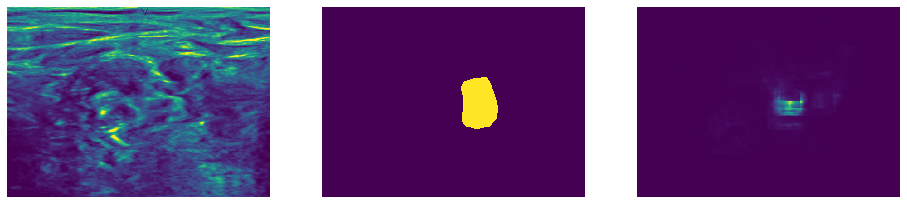


Iteration 99, loss = 0.025179485869862767
Validation loss = 0.030422363313660987

Iteration 199, loss = 0.03149993080405934
Validation loss = 0.019855339949900724

Iteration 299, loss = 0.07141658444470646
Validation loss = 0.06354585724182826

Iteration 399, loss = 0.024027794595108072
Validation loss = 0.020859884654805483

Iteration 499, loss = 0.029646503501340866
Validation loss = 0.043939780846329074

Iteration 599, loss = 0.020345856255089206
Validation loss = 0.03294153370060527

Iteration 699, loss = 0.038790801627259966
Validation loss = 0.08908042815503966

Iteration 799, loss = 0.029646359629954714
Validation loss = 0.023282337422350793

Iteration 899, loss = 0.01674258723515178
Validation loss = 0.02755518171037301

Iteration 999, loss = 0.033989844764394574
Validation loss = 0.023121585035030236

After 23 epochs: loss = 0.033989844764394574
Validation loss = 0.019073071235435737


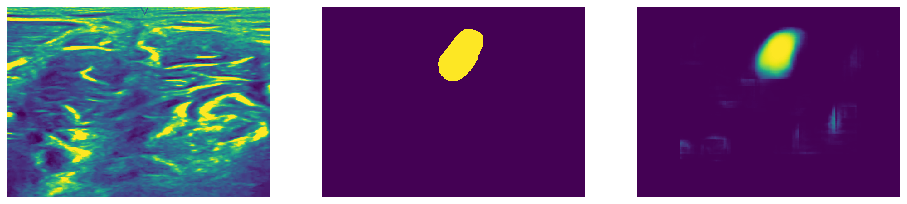


Iteration 99, loss = 0.03257641924125281
Validation loss = 0.02174014900006158

Iteration 199, loss = 0.03674551220229352
Validation loss = 0.02628035624522741

Iteration 299, loss = 0.04215432939694535
Validation loss = 0.025131044098206455

Iteration 399, loss = 0.019712661318289283
Validation loss = 0.05424431491877122

Iteration 499, loss = 0.029571106861964305
Validation loss = 0.027765048069893113

Iteration 599, loss = 0.02194169947912776
Validation loss = 0.018954454307011613

Iteration 699, loss = 0.016665410886180898
Validation loss = 0.042698864852482615

Iteration 799, loss = 0.012138041729509363
Validation loss = 0.021852983535109897

Iteration 899, loss = 0.02743129997347413
Validation loss = 0.017141033173062765

Iteration 999, loss = 0.03921703848134807
Validation loss = 0.13477522603945097

After 24 epochs: loss = 0.03921703848134807
Validation loss = 0.062151093353100435


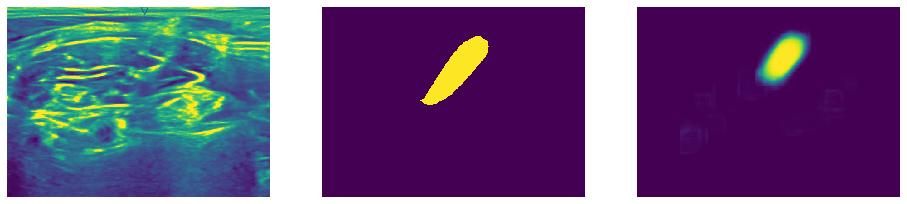


Iteration 99, loss = 0.06389390286664248
Validation loss = 0.027213019696818535

Iteration 199, loss = 0.02637339078786869
Validation loss = 0.019067812077455525

Iteration 299, loss = 0.02265209747151342
Validation loss = 0.06960133942933726

Iteration 399, loss = 0.02918393940786149
Validation loss = 0.0283944649827948

Iteration 499, loss = 0.019699103087284297
Validation loss = 0.030219301808520494

Iteration 599, loss = 0.021048897322493206
Validation loss = 0.04055988501723214

Iteration 699, loss = 0.02556915733935214
Validation loss = 0.02626546379621711

Iteration 799, loss = 0.017414872601316772
Validation loss = 0.03529728559884088

Iteration 899, loss = 0.021989684962674377
Validation loss = 0.032824515515333316

Iteration 999, loss = 0.013035339182008653
Validation loss = 0.1324411030742103

After 25 epochs: loss = 0.013035339182008653
Validation loss = 0.017554511105673003


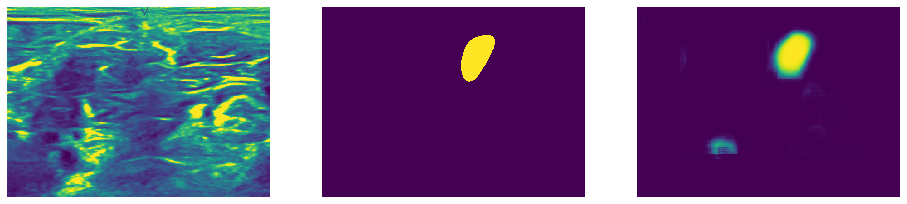


Iteration 99, loss = 0.02351296842924955
Validation loss = 0.07430942415114909

Iteration 199, loss = 0.03630584579477611
Validation loss = 0.014759104360620251

Iteration 299, loss = 0.03967404864673357
Validation loss = 0.021720998637063296

Iteration 399, loss = 0.021397001735138536
Validation loss = 0.055047036410536695

Iteration 499, loss = 0.031555881399549374
Validation loss = 0.030332418903654748

Iteration 599, loss = 0.023949038983840355
Validation loss = 0.03830191682676268

Iteration 699, loss = 0.025592502487209526
Validation loss = 0.18990253403629617

Iteration 799, loss = 0.021788413540804595
Validation loss = 0.039596326067844745

Iteration 899, loss = 0.03599804110021256
Validation loss = 0.10069171419279292

Iteration 999, loss = 0.01761503942699656
Validation loss = 0.10986683436989018

After 26 epochs: loss = 0.01761503942699656
Validation loss = 0.013556093395699824


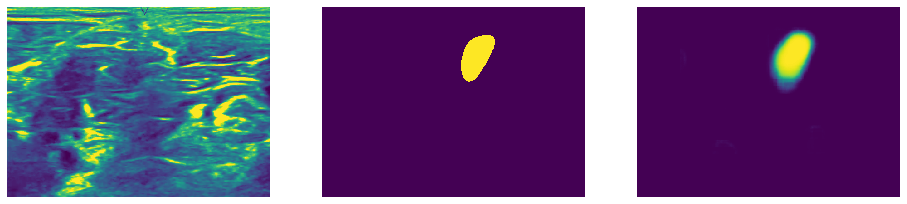


Iteration 99, loss = 0.030474370957949123
Validation loss = 0.03224164932484956

Iteration 199, loss = 0.016753368400449196
Validation loss = 0.027883560335177086

Iteration 299, loss = 0.01816928491940039
Validation loss = 0.050901548850449986

Iteration 399, loss = 0.022790357249272728
Validation loss = 0.1740337607925432

Iteration 499, loss = 0.017897530603824457
Validation loss = 0.05691306631205748

Iteration 599, loss = 0.02355465175421409
Validation loss = 0.03789602638016174

Iteration 699, loss = 0.024465661404511486
Validation loss = 0.04509237218999007

Iteration 799, loss = 0.0165601133225723
Validation loss = 0.02619329323332407

Iteration 899, loss = 0.028323889841593813
Validation loss = 0.051612902198808104

Iteration 999, loss = 0.03311394401230751
Validation loss = 0.025170143017582816

After 27 epochs: loss = 0.03311394401230751
Validation loss = 0.021719586715324403


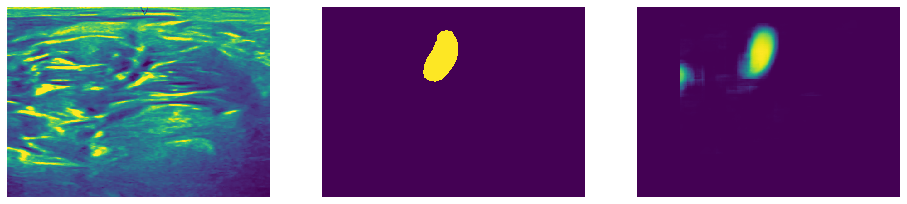


Iteration 99, loss = 0.019217044455047325
Validation loss = 0.05171161338399409

Iteration 199, loss = 0.017907183967174382
Validation loss = 0.17744688536452774

Iteration 299, loss = 0.018055240196905006
Validation loss = 0.03859600181441769

Iteration 399, loss = 0.014064114842685565
Validation loss = 0.12769639583530176

Iteration 499, loss = 0.023996304575285225
Validation loss = 0.0388322995069784

Iteration 599, loss = 0.01799720892384134
Validation loss = 0.0263494498513237

Iteration 699, loss = 0.03099508584307635
Validation loss = 0.027025193413793672

Iteration 799, loss = 0.02273981539774896
Validation loss = 0.09858476355790721

Iteration 899, loss = 0.032672820037942106
Validation loss = 0.02120821646101016

Iteration 999, loss = 0.030711510928110232
Validation loss = 0.08002033084924916

After 28 epochs: loss = 0.030711510928110232
Validation loss = 0.17188682496870564


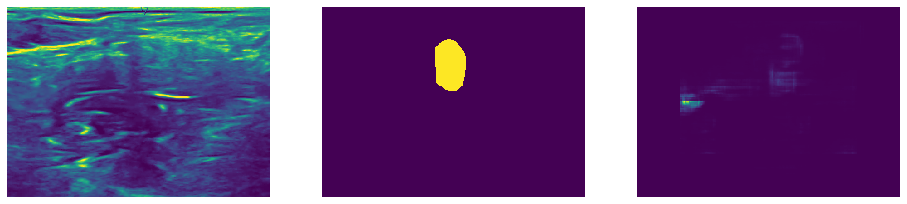


Iteration 99, loss = 0.01683698622171482
Validation loss = 0.07746748954193254

Iteration 199, loss = 0.022020768731035065
Validation loss = 0.04096624025577955

Iteration 299, loss = 0.02704961485759789
Validation loss = 0.07392897115699897

Iteration 399, loss = 0.012211081893756717
Validation loss = 0.057072393108970505

Iteration 499, loss = 0.016749616273424632
Validation loss = 0.012833903046298674

Iteration 599, loss = 0.014925136558776112
Validation loss = 0.24047128699077247

Iteration 699, loss = 0.015522065711178885
Validation loss = 0.055207989522882646

Iteration 799, loss = 0.025747113011128763
Validation loss = 0.19548409050838134

Iteration 899, loss = 0.016524677647931797
Validation loss = 0.06990850278594916

Iteration 999, loss = 0.026211651222243913
Validation loss = 0.08361564105021559

After 29 epochs: loss = 0.026211651222243913
Validation loss = 0.025068367663487696


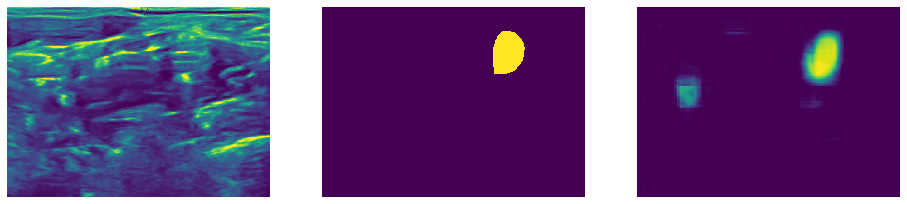


Iteration 99, loss = 0.013278520675823783
Validation loss = 0.21594788412309118

Iteration 199, loss = 0.01665075979434602
Validation loss = 0.01571447587532644

Iteration 299, loss = 0.03693926279043406
Validation loss = 0.05745804530191597

Iteration 399, loss = 0.014653492624273467
Validation loss = 0.05458149575883031

Iteration 499, loss = 0.02863238602258146
Validation loss = 0.10997095282605505

Iteration 599, loss = 0.025888298964728253
Validation loss = 0.025764773792975447

Iteration 699, loss = 0.012994460124355796
Validation loss = 0.017763528768129744

Iteration 799, loss = 0.01107339341355905
Validation loss = 0.010924034586751993

Iteration 899, loss = 0.05074939205172955
Validation loss = 0.04832343623474567

Iteration 999, loss = 0.02194135308401083
Validation loss = 0.0323436278669279

After 30 epochs: loss = 0.02194135308401083
Validation loss = 0.02440977361370676


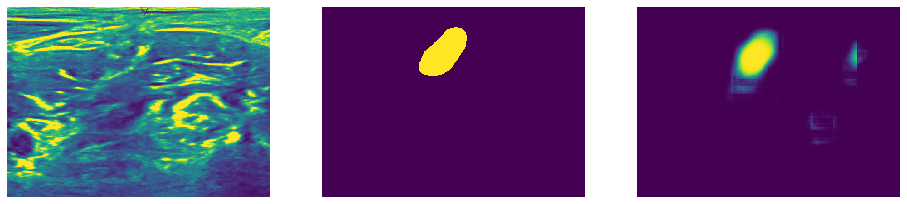


Iteration 99, loss = 0.017482832109776424
Validation loss = 0.031147555856825375

Iteration 199, loss = 0.015328339964460522
Validation loss = 0.024304293526258722

Iteration 299, loss = 0.018279611554045515
Validation loss = 0.10226450688877983

Iteration 399, loss = 0.01976824006034514
Validation loss = 0.12050202251962724

Iteration 499, loss = 0.021112108790502838
Validation loss = 0.1163909483651451

Iteration 599, loss = 0.014273400272991923
Validation loss = 0.023106455167891792

Iteration 699, loss = 0.01635249640647142
Validation loss = 0.013012460262260992

Iteration 799, loss = 0.01722804216592327
Validation loss = 0.03083472258565533

Iteration 899, loss = 0.024520068753219798
Validation loss = 0.01461597969801344

Iteration 999, loss = 0.01766014132818003
Validation loss = 0.04057975434783874

After 31 epochs: loss = 0.01766014132818003
Validation loss = 0.04107266964959531


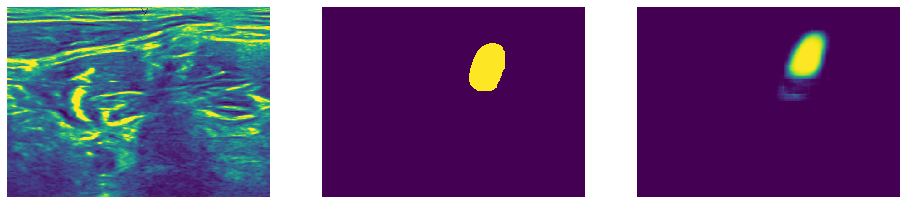


Iteration 99, loss = 0.01568814170772938
Validation loss = 0.024154570218091576

Iteration 199, loss = 0.009178790493851832
Validation loss = 0.014846897276483391

Iteration 299, loss = 0.014198540398834274
Validation loss = 0.026668045674562706

Iteration 399, loss = 0.033980640234100745
Validation loss = 0.02252714687304871

Iteration 499, loss = 0.012135571227927619
Validation loss = 0.11036077948157574

Iteration 599, loss = 0.018699759195091155
Validation loss = 0.037203446069718045

Iteration 699, loss = 0.019136604182650955
Validation loss = 0.027397095228485255

Iteration 799, loss = 0.012654825135536845
Validation loss = 0.037944518133480605

Iteration 899, loss = 0.023912105622814372
Validation loss = 0.08254960791668237

Iteration 999, loss = 0.018392266282822863
Validation loss = 0.02396132170035561

After 32 epochs: loss = 0.018392266282822863
Validation loss = 0.021799031727934372


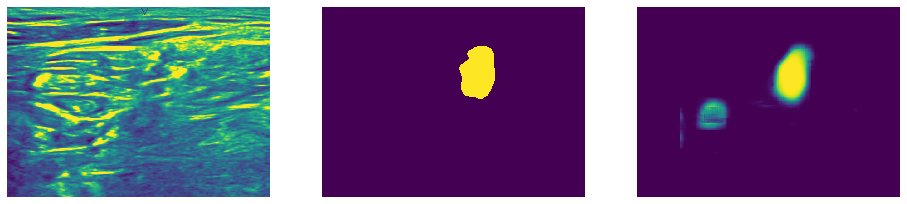


Iteration 99, loss = 0.015993860989399436
Validation loss = 0.18472033067421467

Iteration 199, loss = 0.021649249937280846
Validation loss = 0.017826761231389335

Iteration 299, loss = 0.016639511055194105
Validation loss = 0.06844145452803199

Iteration 399, loss = 0.015302254243336222
Validation loss = 0.028680492970105716

Iteration 499, loss = 0.01619727376525208
Validation loss = 0.06323740242308466

Iteration 599, loss = 0.013870455438918464
Validation loss = 0.0755990959691659

Iteration 699, loss = 0.013510320288068207
Validation loss = 0.07595058123404598

Iteration 799, loss = 0.026280327757485598
Validation loss = 0.016505897569954173

Iteration 899, loss = 0.018602302734688162
Validation loss = 0.016121991292802392

Iteration 999, loss = 0.01560992482909701
Validation loss = 0.012718898415258363

After 33 epochs: loss = 0.01560992482909701
Validation loss = 0.035179800911918906


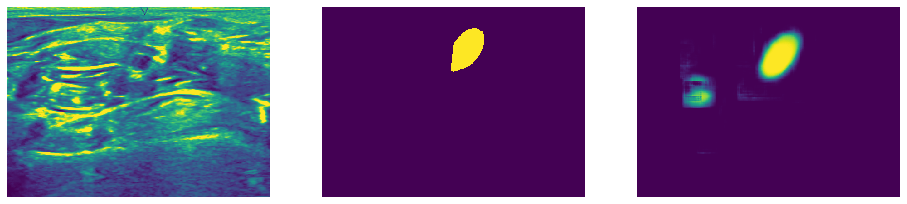


Iteration 99, loss = 0.02390104687053989
Validation loss = 0.18817635968686292

Iteration 199, loss = 0.017678295337718565
Validation loss = 0.027291174758431878

Iteration 299, loss = 0.022513354661898383
Validation loss = 0.058489275208398805

Iteration 399, loss = 0.01381082693104472
Validation loss = 0.13708514396133029

Iteration 499, loss = 0.015768261549557815
Validation loss = 0.13545275790402717

Iteration 599, loss = 0.009425664877953127
Validation loss = 0.024701197644967345

Iteration 699, loss = 0.015968624457766808
Validation loss = 0.032272914837167516

Iteration 799, loss = 0.022826982171302083
Validation loss = 0.017863516957938527

Iteration 899, loss = 0.01726050854002509
Validation loss = 0.012929365956039815

Iteration 999, loss = 0.027639100129531923
Validation loss = 0.21082235253098167

After 34 epochs: loss = 0.027639100129531923
Validation loss = 0.08138322146343767


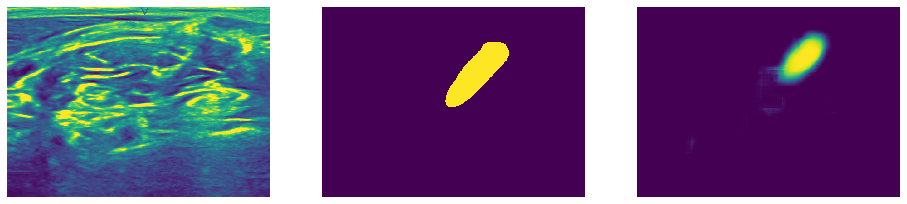


Iteration 99, loss = 0.016501877978257317
Validation loss = 0.047755778724901464

Iteration 199, loss = 0.01048298076987948
Validation loss = 0.023007597249664093

Iteration 299, loss = 0.014515498581826703
Validation loss = 0.01656388859075999

Iteration 399, loss = 0.014066428828870572
Validation loss = 0.015863865634954163

Iteration 499, loss = 0.015687668316663364
Validation loss = 0.06582404291958352

Iteration 599, loss = 0.0333039415906213
Validation loss = 0.19602034905790233

Iteration 699, loss = 0.010387367481997884
Validation loss = 0.048394922431834145

Iteration 799, loss = 0.016069494504041607
Validation loss = 0.04978328033970742

Iteration 899, loss = 0.042166590917390175
Validation loss = 0.019227790614538214

Iteration 999, loss = 0.014582584465061124
Validation loss = 0.025500013836213396

After 35 epochs: loss = 0.014582584465061124
Validation loss = 0.06350829319823034


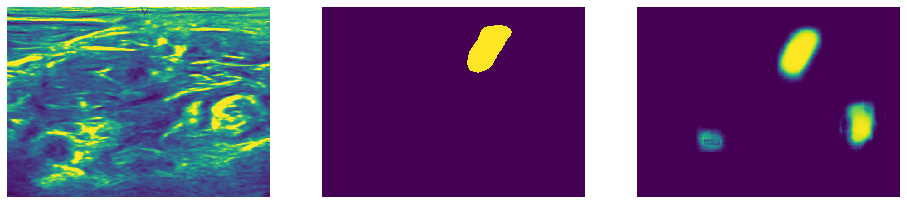


Iteration 99, loss = 0.016137583387949527
Validation loss = 0.011731550993886607

Iteration 199, loss = 0.019216565125191515
Validation loss = 0.06329871288495109

Iteration 299, loss = 0.012900556563212462
Validation loss = 0.23914669698058638

Iteration 399, loss = 0.018278095340903983
Validation loss = 0.11044080592114094

Iteration 499, loss = 0.015414996537369666
Validation loss = 0.014378398610333583

Iteration 599, loss = 0.011482937351227065
Validation loss = 0.02451836670478903

Iteration 699, loss = 0.012198434168510389
Validation loss = 0.11507657975318726

Iteration 799, loss = 0.012247842660133674
Validation loss = 0.046292252420107254

Iteration 899, loss = 0.0434762467443936
Validation loss = 0.04037726178445345

Iteration 999, loss = 0.013033771923023825
Validation loss = 0.01742323902911616

After 36 epochs: loss = 0.013033771923023825
Validation loss = 0.08070849156264955


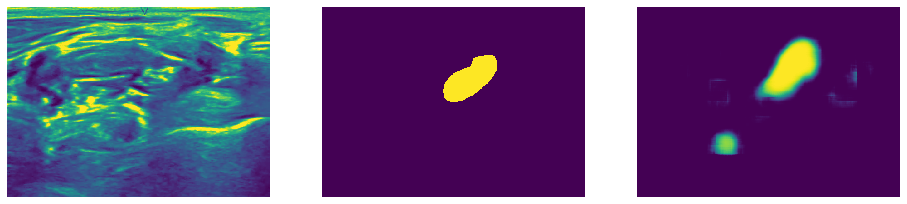


Iteration 99, loss = 0.00809684509258316
Validation loss = 0.01917782515660333

Iteration 199, loss = 0.029838649402249656
Validation loss = 0.012482680578201151

Iteration 299, loss = 0.028925884464106516
Validation loss = 0.04391783615610778

Iteration 399, loss = 0.01261912305301072
Validation loss = 0.17260695130741327

Iteration 499, loss = 0.00965723396717842
Validation loss = 0.013877951609154117

Iteration 599, loss = 0.015540332283217958
Validation loss = 0.056957808898886096

Iteration 699, loss = 0.011964598373149456
Validation loss = 0.07088188934909273

Iteration 799, loss = 0.014604836681239425
Validation loss = 0.044966354167232554

Iteration 899, loss = 0.02593518273864647
Validation loss = 0.017760141623928163

Iteration 999, loss = 0.0096020064542526
Validation loss = 0.015572505349812825

After 37 epochs: loss = 0.0096020064542526
Validation loss = 0.1768422092833515


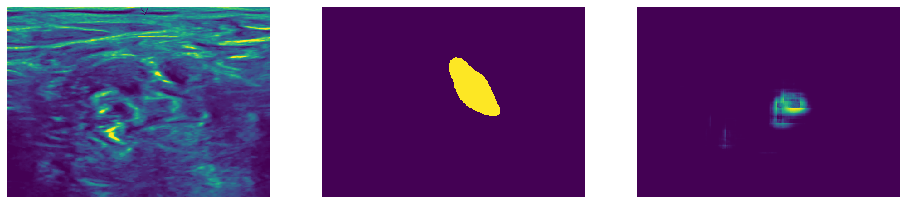


Iteration 99, loss = 0.014660187992663757
Validation loss = 0.014128927675432675

Iteration 199, loss = 0.0098001962861753
Validation loss = 0.03593701089584421

Iteration 299, loss = 0.008631631016590783
Validation loss = 0.020965008407899284

Iteration 399, loss = 0.014291567894387331
Validation loss = 0.12851452096286384

Iteration 499, loss = 0.01524227642400549
Validation loss = 0.023830094976399895

Iteration 599, loss = 0.013523753612272737
Validation loss = 0.02839861592149198

Iteration 699, loss = 0.012397832893645213
Validation loss = 0.06289837753339782

Iteration 799, loss = 0.011660370039823795
Validation loss = 0.011520531872859677

Iteration 899, loss = 0.009323085740257505
Validation loss = 0.10684660080092588

Iteration 999, loss = 0.011553574012929618
Validation loss = 0.025823769531020946

After 38 epochs: loss = 0.011553574012929618
Validation loss = 0.11176351125727046


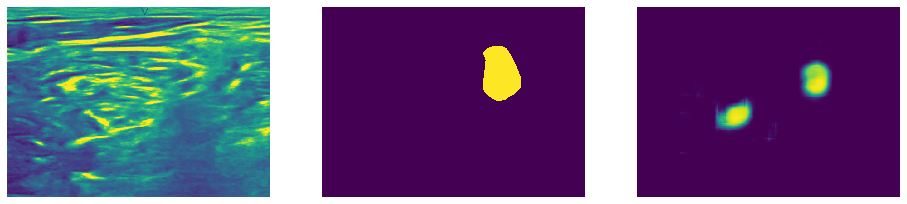


Iteration 99, loss = 0.00986113846036293
Validation loss = 0.07523168237318402

Iteration 199, loss = 0.019378167563526887
Validation loss = 0.02025554202378671

Iteration 299, loss = 0.013366641516944179
Validation loss = 0.1322036465744033

Iteration 399, loss = 0.013278595119313945
Validation loss = 0.018489473539180377

Iteration 499, loss = 0.01630597980898013
Validation loss = 0.025235662234020347

Iteration 599, loss = 0.00845243074304936
Validation loss = 0.07805485965001713

Iteration 699, loss = 0.01189414036863374
Validation loss = 0.0077213434667849174

Iteration 799, loss = 0.012072180069991946
Validation loss = 0.020040797386867534

Iteration 899, loss = 0.013629112568901085
Validation loss = 0.023807010138794295

Iteration 999, loss = 0.00886393204508946
Validation loss = 0.022589604553555333

After 39 epochs: loss = 0.00886393204508946
Validation loss = 0.05196282312574232


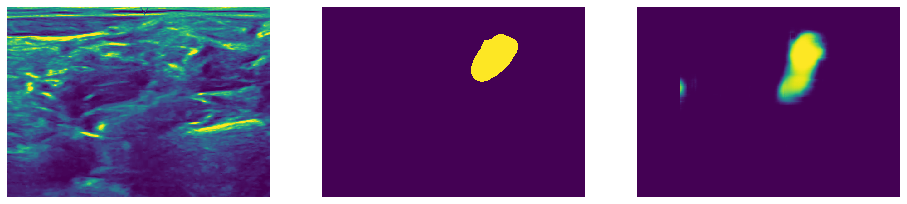


Iteration 99, loss = 0.008062955356610878
Validation loss = 0.24254766205452724

Iteration 199, loss = 0.007947111009826015
Validation loss = 0.02031361524724561

Iteration 299, loss = 0.01628506730858605
Validation loss = 0.0353003383236689

Iteration 399, loss = 0.0382759906443258
Validation loss = 0.04394785388790017

Iteration 499, loss = 0.03497958646256231
Validation loss = 0.11121679477544809

Iteration 599, loss = 0.01116946066274862
Validation loss = 0.042341047994674925

Iteration 699, loss = 0.016439954135562554
Validation loss = 0.058495479823981227

Iteration 799, loss = 0.01618289661225799
Validation loss = 0.08162871816297389

Iteration 899, loss = 0.010038640098971829
Validation loss = 0.01941709548958273

Iteration 999, loss = 0.011212940014905103
Validation loss = 0.016673477532733613

After 40 epochs: loss = 0.011212940014905103
Validation loss = 0.0350353396303633


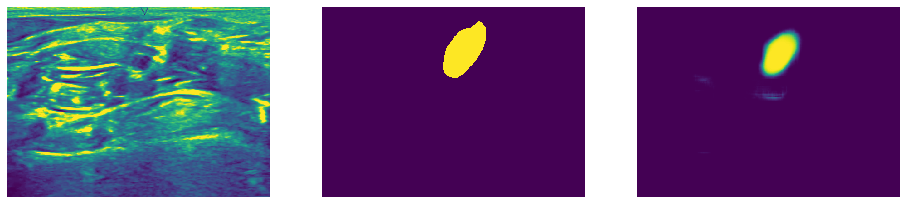


Iteration 99, loss = 0.013847941664685266
Validation loss = 0.028756361007654448

Iteration 199, loss = 0.008862571642219139
Validation loss = 0.05885141378536954

Iteration 299, loss = 0.010869219633292107
Validation loss = 0.030040414500066278

Iteration 399, loss = 0.0075355492711513235
Validation loss = 0.024036736232097573

Iteration 499, loss = 0.011550503347429733
Validation loss = 0.24899933581357667

Iteration 599, loss = 0.0179526750343819
Validation loss = 0.009589292268643036

Iteration 699, loss = 0.01944273701659069
Validation loss = 0.09553219155855323

Iteration 799, loss = 0.011454756924840168
Validation loss = 0.046108066996595594

Iteration 899, loss = 0.00765552309015824
Validation loss = 0.040192029219524195

Iteration 999, loss = 0.010454979200768134
Validation loss = 0.026962665499888107

After 41 epochs: loss = 0.010454979200768134
Validation loss = 0.10976308589523932


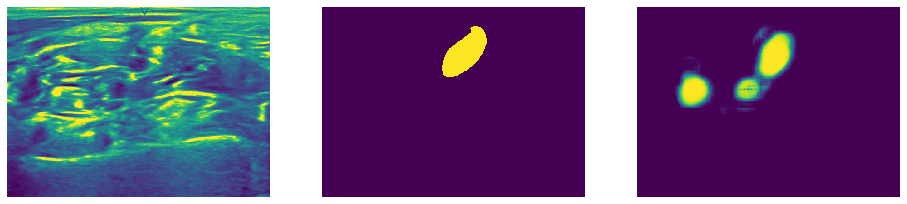


Iteration 99, loss = 0.011582707667662201
Validation loss = 0.04169845067294008

Iteration 199, loss = 0.015463001978572454
Validation loss = 0.0701009223996303

Iteration 299, loss = 0.011050989722303079
Validation loss = 0.12426528124260519

Iteration 399, loss = 0.010194552318740346
Validation loss = 0.05786961207765245

Iteration 499, loss = 0.014955330651964329
Validation loss = 0.03203285277290483

Iteration 599, loss = 0.008275936346049936
Validation loss = 0.11548032445114259

Iteration 699, loss = 0.015092698284520468
Validation loss = 0.011623565887769326

Iteration 799, loss = 0.008698014075304907
Validation loss = 0.04791021943272714

Iteration 899, loss = 0.008335588099236825
Validation loss = 0.051171126043549675

Iteration 999, loss = 0.008567201530223636
Validation loss = 0.051280509461127395

After 42 epochs: loss = 0.008567201530223636
Validation loss = 0.08365959521654795


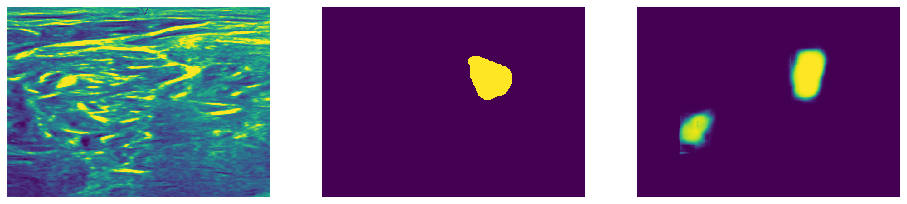


Iteration 99, loss = 0.010225858103993735
Validation loss = 0.011714427406520322

Iteration 199, loss = 0.007085714973687477
Validation loss = 0.023844248743557183

Iteration 299, loss = 0.011834742354022003
Validation loss = 0.00821503377855307

Iteration 399, loss = 0.015503787696674444
Validation loss = 0.0186057618789229

Iteration 499, loss = 0.011171840398329635
Validation loss = 0.1269462862358252

Iteration 599, loss = 0.013717602130846258
Validation loss = 0.056674106036613416

Iteration 699, loss = 0.010297958161330806
Validation loss = 0.05496862430194948

Iteration 799, loss = 0.028264381606012343
Validation loss = 0.06315791626163116

Iteration 899, loss = 0.009893885856852526
Validation loss = 0.026194078779295176

Iteration 999, loss = 0.007876246827657607
Validation loss = 0.06597006842481264

After 43 epochs: loss = 0.007876246827657607
Validation loss = 0.018908329079633204


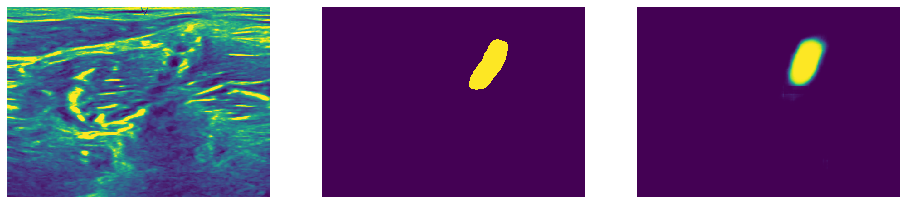


Iteration 99, loss = 0.01102742804633914
Validation loss = 0.03103913898879205

Iteration 199, loss = 0.007523374657451688
Validation loss = 0.00906717099683333

Iteration 299, loss = 0.010181327287711508
Validation loss = 0.015110220243370727

Iteration 399, loss = 0.039154115868528815
Validation loss = 0.15043800129038543

Iteration 499, loss = 0.006432703627864721
Validation loss = 0.2002778984736541

Iteration 599, loss = 0.013023158001807283
Validation loss = 0.015961252260718598

Iteration 699, loss = 0.009582970274231578
Validation loss = 0.37925734757469987

Iteration 799, loss = 0.00855426286250299
Validation loss = 0.1594632324021874

Iteration 899, loss = 0.011810509113411378
Validation loss = 0.03304266729906285

Iteration 999, loss = 0.007686224154338515
Validation loss = 0.26303951602506004

After 44 epochs: loss = 0.007686224154338515
Validation loss = 0.03375320667182798


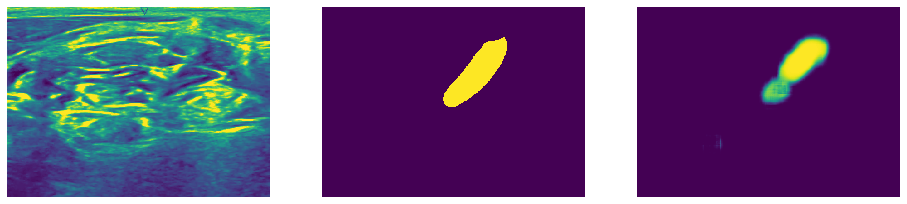


Iteration 99, loss = 0.005718033431723538
Validation loss = 0.021454741440263728

Iteration 199, loss = 0.016265085136935316
Validation loss = 0.029165487922376013

Iteration 299, loss = 0.014864625247133499
Validation loss = 0.07851412953118267

Iteration 399, loss = 0.01971474834451128
Validation loss = 0.03474697720917807

Iteration 499, loss = 0.010719912587457017
Validation loss = 0.04348353239876888

Iteration 599, loss = 0.007600542207065701
Validation loss = 0.02091826956076228

Iteration 699, loss = 0.005052815102048731
Validation loss = 0.03176967475422379

Iteration 799, loss = 0.0070771285158512404
Validation loss = 0.03197974906560685

Iteration 899, loss = 0.0079610963736478
Validation loss = 0.057697712483833555

Iteration 999, loss = 0.01124917039968881
Validation loss = 0.049445608939899736

After 45 epochs: loss = 0.01124917039968881
Validation loss = 0.07431830953829713


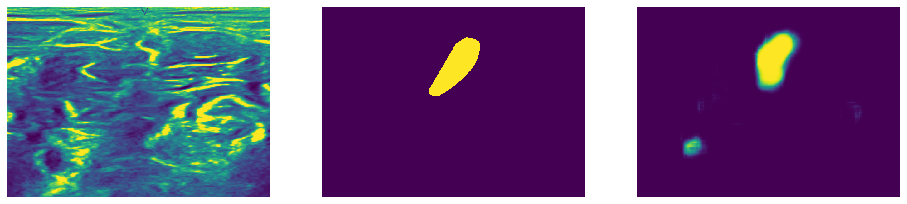


Iteration 99, loss = 0.009461105512968504
Validation loss = 0.050784437677846316

Iteration 199, loss = 0.008682293148209657
Validation loss = 0.036893420269539255

Iteration 299, loss = 0.005786233498529227
Validation loss = 0.40162180512628043

Iteration 399, loss = 0.008782926912953631
Validation loss = 0.03446267751349193

Iteration 499, loss = 0.011336994335837748
Validation loss = 0.17127876183821422

Iteration 599, loss = 0.019203291257771243
Validation loss = 0.02354727120313086

Iteration 699, loss = 0.011717709689856155
Validation loss = 0.04122951506474624

Iteration 799, loss = 0.018287896355220035
Validation loss = 0.15060180613674956

Iteration 899, loss = 0.011508577414010054
Validation loss = 0.027175816280432415

Iteration 999, loss = 0.015815098936623508
Validation loss = 0.059639589851941094

After 46 epochs: loss = 0.015815098936623508
Validation loss = 0.046530995618960284


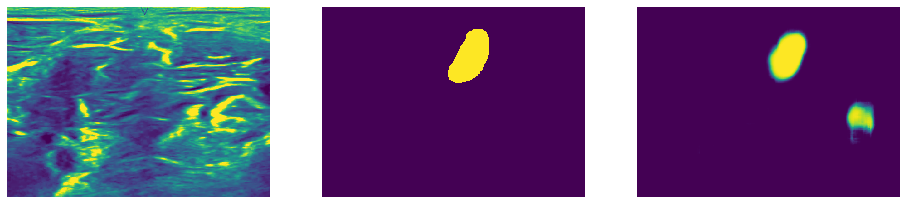


Iteration 99, loss = 0.00921420102439778
Validation loss = 0.12040023710623332

Iteration 199, loss = 0.015758272355001872
Validation loss = 0.07902900304532248

Iteration 299, loss = 0.008187777955694123
Validation loss = 0.035069241897161985

Iteration 399, loss = 0.014404036092401208
Validation loss = 0.09892662564976117

Iteration 499, loss = 0.011054946660546301
Validation loss = 0.012250582533131013

Iteration 599, loss = 0.007163573275701705
Validation loss = 0.021467523775431076

Iteration 699, loss = 0.007905102626063174
Validation loss = 0.034179111390070106

Iteration 799, loss = 0.0126617197059194
Validation loss = 0.04403413976341477

Iteration 899, loss = 0.01315725955777006
Validation loss = 0.01862489920041775

Iteration 999, loss = 0.02194247723781323
Validation loss = 0.017082873176224533

After 47 epochs: loss = 0.02194247723781323
Validation loss = 0.031685692412874805


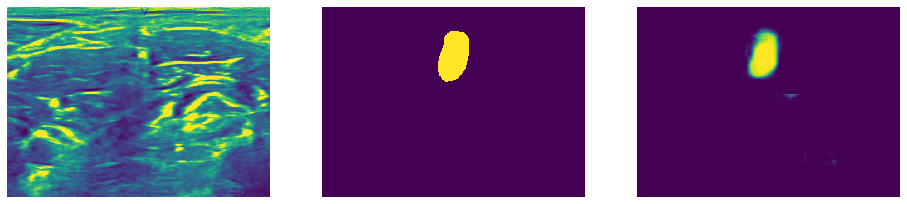


Iteration 99, loss = 0.009164293783986168
Validation loss = 0.19935300487297017

Iteration 199, loss = 0.013646133722730895
Validation loss = 0.2563723683038262

Iteration 299, loss = 0.01108812176905583
Validation loss = 0.021111358421994415

Iteration 399, loss = 0.01385289609981788
Validation loss = 0.04980624450366814

Iteration 499, loss = 0.015356971798881774
Validation loss = 0.2499193148261724

Iteration 599, loss = 0.007349848861517874
Validation loss = 0.2631626150523718

Iteration 699, loss = 0.009316745648204122
Validation loss = 0.0940719189035716

Iteration 799, loss = 0.01602022128884086
Validation loss = 0.05490747253125987

Iteration 899, loss = 0.005468292695297933
Validation loss = 0.05414178457174828

Iteration 999, loss = 0.009014688052426683
Validation loss = 0.047288333507418456

After 48 epochs: loss = 0.009014688052426683
Validation loss = 0.014652207128034316


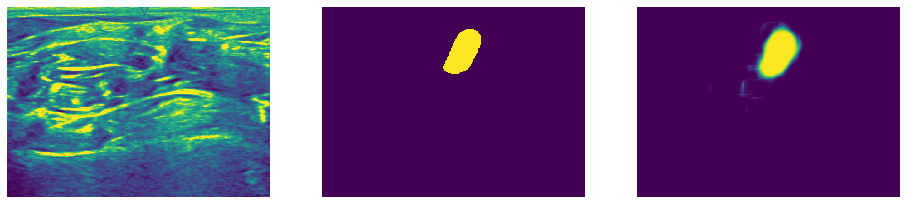


Iteration 99, loss = 0.01214772009922284
Validation loss = 0.31403299695503134

Iteration 199, loss = 0.013855663233778584
Validation loss = 0.027563574158864276

Iteration 299, loss = 0.00653920236019273
Validation loss = 0.4010158579059191

Iteration 399, loss = 0.008198810182929759
Validation loss = 0.061172142473339276

Iteration 499, loss = 0.006510214651270525
Validation loss = 0.2695096084017874

Iteration 599, loss = 0.00671215142809522
Validation loss = 0.27351624486835924

Iteration 699, loss = 0.010133760457483178
Validation loss = 0.028100998880851352

Iteration 799, loss = 0.008680122134701637
Validation loss = 0.08737235629919012

Iteration 899, loss = 0.017961408004595277
Validation loss = 0.027252933874836217

Iteration 999, loss = 0.009812795665885846
Validation loss = 0.028478224751078658

After 49 epochs: loss = 0.009812795665885846
Validation loss = 0.11924365639657139


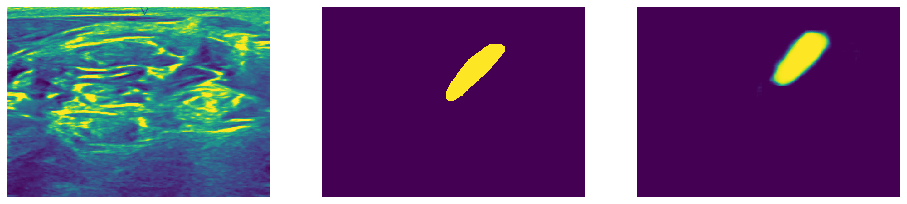


Iteration 99, loss = 0.008641107694934149
Validation loss = 0.048402291451887645

Iteration 199, loss = 0.008149904465513192
Validation loss = 0.012360896902285062

Iteration 299, loss = 0.01680408238376094
Validation loss = 0.02447119223072268

Iteration 399, loss = 0.01175190003929389
Validation loss = 0.03248267522107199

Iteration 499, loss = 0.007957736160445384
Validation loss = 0.017593991593596314

Iteration 599, loss = 0.011562407722886494
Validation loss = 0.009348019429979593

Iteration 699, loss = 0.008363563444523261
Validation loss = 0.311671094275784

Iteration 799, loss = 0.005850045532832313
Validation loss = 0.025182545425426948

Iteration 899, loss = 0.01158482738890108
Validation loss = 0.05494641941375967

Iteration 999, loss = 0.006529287555040668
Validation loss = 0.19292112074934942

After 50 epochs: loss = 0.006529287555040668
Validation loss = 0.04005695292439569


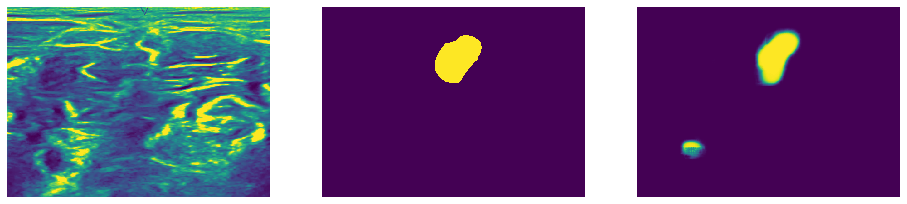


CPU times: user 3h 26min 44s, sys: 1h 24min 20s, total: 4h 51min 4s
Wall time: 4h 27min 42s


In [9]:
%%time
# optimizer = optim.SGD(unet.parameters(),
#                       lr=0.001,
#                       momentum=0.7,
#                       weight_decay=0.01,
#                       dampening=0,
#                       nesterov=True)

optimizer = optim.Adam(unet.parameters(), lr=0.0001)

train(unet, optimizer, loader_train, loader_val, epochs=50, print_every=100)

In [10]:
torch.save(unet.state_dict(), os.path.join(MODEL_PATH, 'unet_filters64_epochs50.pth'))

In [8]:
unet.load_state_dict(torch.load(os.path.join(MODEL_PATH, 'unet_filters64_epochs50.pth')))
unet.eval()

Unet(
  (down_block1): ConvBlock(
    (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  )
  (down_block2): ConvBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (down_block3): ConvBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (down_block4): ConvBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (bottom_block): ConvBlock(
    (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (upconv1): ConvTranspose2d(1024, 512, kernel_size=(2, 2)

## Generate submission

In [11]:
testset = USNSDataset(os.path.join(DATA_PATH, 'test'), train=False, transform=transform, mask_transform=transform_mask)
loader_test = DataLoader(testset, batch_size=4)

In [ ]:
%%time
fname = datetime.now().strftime('%Y%m%d_%H%M%S') + '.csv'
subms_path = os.path.join(SUBMS_PATH, fname)
generate_submission(unet, loader_test, subms_path)

In [12]:
x, y = next(iter(loader_test))

In [13]:
with torch.no_grad():
    pred_y = torch.sigmoid(unet(x.to(device)))
    pred_y = pred_y.cpu()
    pred_binary = eval_model(unet, x.to(device))
    pred_binary = pred_binary.cpu()

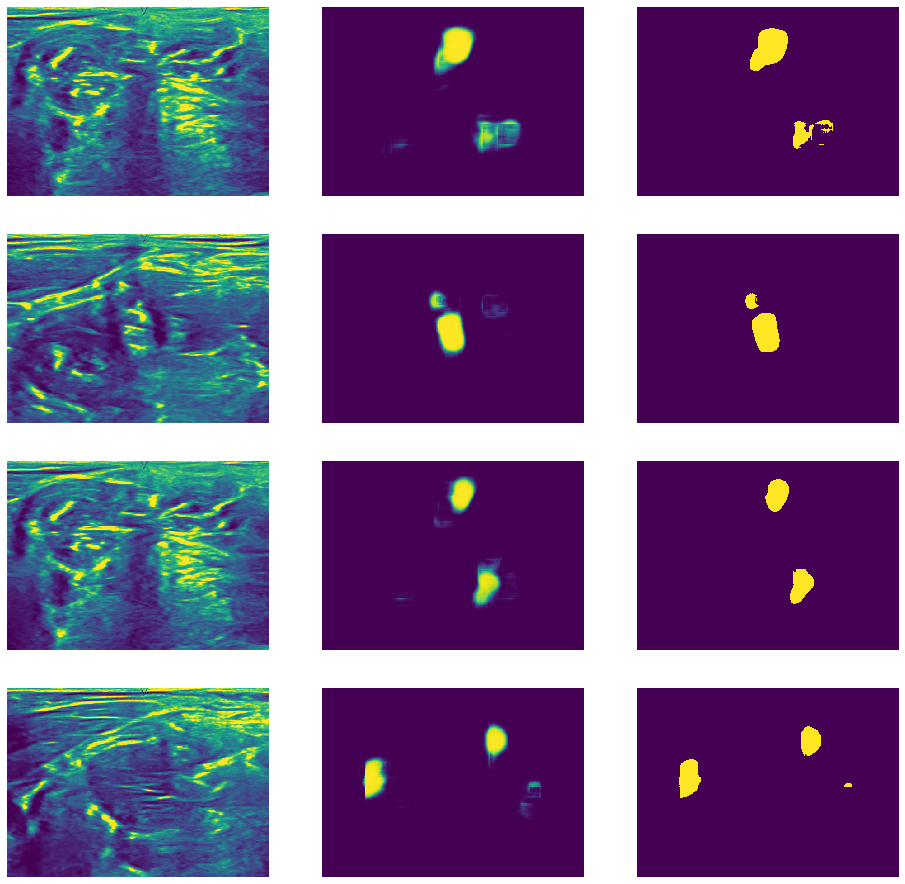

In [16]:
# def show_imgs(imglist):
#     f, axarr = plt.subplots(1, len(imglist))
#     with torch.no_grad():
#         for ii, data in enumerate(imglist):
#             axarr[ii].axis('off')
#             axarr[ii].imshow(data)
#     plt.show()

# show_imgs([x[0, 0], y[0, 0]])
show_imgs([x, pred_y, pred_binary])

In [17]:
unet.parameters()

<generator object Module.parameters at 0x7f92533bb510>

In [18]:
n_params = 0
for param in unet.parameters():
    n_params += np.prod(param.shape)
n_params

31030593